### Zakupoholicy - Część 03 - REGRESJA LOGISTYCZNA

Dane: https://www.kaggle.com/datasets/benpowis/customer-propensity-to-purchase-data


Cel: analiza czy dany klient wykona u nas zakupy czy nie


Stakeholder: właściciel sklepu internetowego starający się zminimalizować ryzyko
występowania porzuconego koszyka

### ANALIZA - SPRAWDZMY CO MA WPLYW NA DODAWANIE RZECZY DO KOSZYKA PRZEZ KLIENTA

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import plotly.graph_objects as go

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay, roc_curve


Dodajmy baze danych juz zmienioną na jezyk polski z pliku "00_DATA_CLEANING_Customer propensity to purchase"



In [3]:
df_all = pd.read_csv('training_sample_pl_clean.csv')

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220061 entries, 0 to 220060
Data columns (total 26 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   ID_uzytkownika                      220061 non-null  object
 1   klik_ikony_koszyka                  220061 non-null  int64 
 2   dodanie_do_koszyka_z_listy          220061 non-null  int64 
 3   dodanie_do_koszyka_z_detali         220061 non-null  int64 
 4   sortowanie_produktu                 220061 non-null  int64 
 5   wybor_obrazu                        220061 non-null  int64 
 6   klik_na_strone_konta                220061 non-null  int64 
 7   klik_na_baner_promo                 220061 non-null  int64 
 8   dodanie_do_listy_zyczen_z_detali    220061 non-null  int64 
 9   rozwijana_lista_produktu            220061 non-null  int64 
 10  zamkniecie_mini_koszyka             220061 non-null  int64 
 11  sprawdzenie_info_dostawy_produkt    220

Usuniemy z obu zestawow kolumne 

- 'kto' - robocza kolumna do podzielenia naszych zestawow 

- 'ID_uzytkownika' - kolejna kolumna nie binarna

In [6]:
df_all = df_all.drop(columns = ['kto'])

In [7]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220061 entries, 0 to 220060
Data columns (total 25 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   ID_uzytkownika                      220061 non-null  object
 1   klik_ikony_koszyka                  220061 non-null  int64 
 2   dodanie_do_koszyka_z_listy          220061 non-null  int64 
 3   dodanie_do_koszyka_z_detali         220061 non-null  int64 
 4   sortowanie_produktu                 220061 non-null  int64 
 5   wybor_obrazu                        220061 non-null  int64 
 6   klik_na_strone_konta                220061 non-null  int64 
 7   klik_na_baner_promo                 220061 non-null  int64 
 8   dodanie_do_listy_zyczen_z_detali    220061 non-null  int64 
 9   rozwijana_lista_produktu            220061 non-null  int64 
 10  zamkniecie_mini_koszyka             220061 non-null  int64 
 11  sprawdzenie_info_dostawy_produkt    220

In [8]:
df_all = df_all.drop(columns = ['ID_uzytkownika'])

In [9]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220061 entries, 0 to 220060
Data columns (total 24 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   klik_ikony_koszyka                  220061 non-null  int64
 1   dodanie_do_koszyka_z_listy          220061 non-null  int64
 2   dodanie_do_koszyka_z_detali         220061 non-null  int64
 3   sortowanie_produktu                 220061 non-null  int64
 4   wybor_obrazu                        220061 non-null  int64
 5   klik_na_strone_konta                220061 non-null  int64
 6   klik_na_baner_promo                 220061 non-null  int64
 7   dodanie_do_listy_zyczen_z_detali    220061 non-null  int64
 8   rozwijana_lista_produktu            220061 non-null  int64
 9   zamkniecie_mini_koszyka             220061 non-null  int64
 10  sprawdzenie_info_dostawy_produkt    220061 non-null  int64
 11  sprawdzenie_info_zwrotu             220061 non-null 

### Co mamy w tabeli:

<b>klik_ikony_koszyka - </b>

Czy odwiedzający kliknął ikonę koszyka?

<b>dodanie_do_koszyka_z_listy - </b>

Czy odwiedzający dodał produkt do koszyka na stronie 'lista'?

<b>dodanie_do_koszyka_z_detali - </b>

Czy odwiedzający dodał produkt do koszyka na stronie szczegolu produktu?

<b>sortowanie_produktu - </b>

Czy odwiedzający sortował produkty na stronie?

<b>wybor_obrazu - </b>

Czy odwiedzający skorzystał z wyboru obrazu?

<b>klik_na_strone_konta - </b>

Czy odwiedzający odwiedził stronę swojego konta?

<b>klik_na_baner_promo - </b>

Czy odwiedzający kliknął na baner promocyjny?

<b>dodanie_do_listy_zyczen_z_detali - </b>

Czy odwiedzający dodał produkt do listy życzeń ze strony szczegolu produktu?

<b>rozwijana_lista_produktu - </b>

Czy odwiedzający korzystał z rozwijanej listy produktu?

<b>zamkniecie_mini_koszyka - </b>

Czy odwiedzający zamknął mini koszyk?

<b>sprawdzenie_info_dostawy_produkt - </b>

Czy odwiedzający sprawdził szczegóły dostawy na stronie produktu?

<b>sprawdzenie_info_zwrotu - </b>

Czy odwiedzający sprawdził szczegóły zwrotu na stronie produktu?

<b>logowanie - </b>

Czy odwiedzający zalogował się na stronie?

<b>wyswietlenie_realizacji_zamowienia - </b>

Czy odwiedzający zobaczył stronę realizacji zamówienia?

<b>wyswietlenie_tabeli_rozmiarow - </b>

Czy odwiedzający zobaczył tabelę rozmiarów produktu?

<b>wyswietlenie_info_o_dostawie_FAQ - </b>

Czy odwiedzający zobaczył stronę FAQ o dostawie?

<b>wyswietlenie_opcji_upgrade_konta - </b>

Czy odwiedzający zobaczył stronę ulepszenia konta?

<b>wyswietlenie_strony_glownej - </b>

Czy odwiedzający zobaczył stronę główną?

<b>urzadzenie_mobilne - </b>

Czy odwiedzający używał urządzenia mobilnego?

<b>komputer - </b>

Czy odwiedzający używał komputera?

<b>tablet - </b>

Czy odwiedzający używał tabletu?

<b>powracajcy_klient - </b>

Czy odwiedzający był nowym czy powracającym klientem?

<b>lokalizacja_uk - </b>

Czy odwiedzający znajdował się w Wielkiej Brytanii, na podstawie adresu IP?

<b>zlozone_zamoienie - </b>

Czy klient złożył zamówienie?

In [10]:
df_all.describe()

,klik_ikony_koszyka,dodanie_do_koszyka_z_listy,dodanie_do_koszyka_z_detali,sortowanie_produktu,wybor_obrazu,klik_na_strone_konta,klik_na_baner_promo,dodanie_do_listy_zyczen_z_detali,rozwijana_lista_produktu,zamkniecie_mini_koszyka,sprawdzenie_info_dostawy_produkt,sprawdzenie_info_zwrotu,logowanie,wyswietlenie_realizacji_zamowienia,wyswietlenie_tabeli_rozmiarow,wyswietlenie_info_o_dostawie_FAQ,wyswietlenie_opcji_upgrade_konta,wyswietlenie_strony_glownej,urzadzenie_mobilne,komputer,tablet,powracajcy_klient,lokalizacja_uk,zlozone_zamowienie
count,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.00000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000
mean,0.205184,0.154216,0.233672,0.076256,0.055326,0.007389,0.033541,0.007266,0.476718,0.035754,0.130114,0.018995,0.183785,0.165731,0.000804,0.01147,0.002268,0.600184,0.641027,0.231618,0.133749,0.595417,0.923026,0.086762
std,0.403837,0.361157,0.423167,0.265408,0.228615,0.085641,0.180044,0.084932,0.499459,0.185676,0.336429,0.136506,0.387310,0.371840,0.028349,0.10648,0.047565,0.489862,0.479700,0.421867,0.340384,0.490812,0.266551,0.281487
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


8,6% zlozonych zamowien w całym zestawie danych

DODAJMY NOWĄ KOLUMNE BINARNA 

Dla każdej 1 w kolumnie 

- dodanie_do_koszyka_z_listy 

- dodanie_do_koszyka_z_detali 

tworzymy nową kolumne - dodanie_do_koszyka.

In [11]:
df_all.columns

Index(['klik_ikony_koszyka', 'dodanie_do_koszyka_z_listy',
       'dodanie_do_koszyka_z_detali', 'sortowanie_produktu', 'wybor_obrazu',
       'klik_na_strone_konta', 'klik_na_baner_promo',
       'dodanie_do_listy_zyczen_z_detali', 'rozwijana_lista_produktu',
       'zamkniecie_mini_koszyka', 'sprawdzenie_info_dostawy_produkt',
       'sprawdzenie_info_zwrotu', 'logowanie',
       'wyswietlenie_realizacji_zamowienia', 'wyswietlenie_tabeli_rozmiarow',
       'wyswietlenie_info_o_dostawie_FAQ', 'wyswietlenie_opcji_upgrade_konta',
       'wyswietlenie_strony_glownej', 'urzadzenie_mobilne', 'komputer',
       'tablet', 'powracajcy_klient', 'lokalizacja_uk', 'zlozone_zamowienie'],
      dtype='object')

In [12]:
((df_all['dodanie_do_koszyka_z_listy'] == 1) | (df_all['dodanie_do_koszyka_z_detali'] == 1)).sum()

68621

In [13]:
df_all['dodanie_do_koszyka'] = ((df_all['dodanie_do_koszyka_z_listy'] == 1) | 
                                (df_all['dodanie_do_koszyka_z_detali'] == 1)).astype(int)

In [14]:
df_all['dodanie_do_koszyka'].sum()

68621

In [15]:
df_all.describe()

,klik_ikony_koszyka,dodanie_do_koszyka_z_listy,dodanie_do_koszyka_z_detali,sortowanie_produktu,wybor_obrazu,klik_na_strone_konta,klik_na_baner_promo,dodanie_do_listy_zyczen_z_detali,rozwijana_lista_produktu,zamkniecie_mini_koszyka,sprawdzenie_info_dostawy_produkt,sprawdzenie_info_zwrotu,logowanie,wyswietlenie_realizacji_zamowienia,wyswietlenie_tabeli_rozmiarow,wyswietlenie_info_o_dostawie_FAQ,wyswietlenie_opcji_upgrade_konta,wyswietlenie_strony_glownej,urzadzenie_mobilne,komputer,tablet,powracajcy_klient,lokalizacja_uk,zlozone_zamowienie,dodanie_do_koszyka
count,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.00000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000
mean,0.205184,0.154216,0.233672,0.076256,0.055326,0.007389,0.033541,0.007266,0.476718,0.035754,0.130114,0.018995,0.183785,0.165731,0.000804,0.01147,0.002268,0.600184,0.641027,0.231618,0.133749,0.595417,0.923026,0.086762,0.311827
std,0.403837,0.361157,0.423167,0.265408,0.228615,0.085641,0.180044,0.084932,0.499459,0.185676,0.336429,0.136506,0.387310,0.371840,0.028349,0.10648,0.047565,0.489862,0.479700,0.421867,0.340384,0.490812,0.266551,0.281487,0.463241
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


mozemy usunac te dwie doatkowe kolumny dodania do koszyka

In [16]:
df_all.drop(['dodanie_do_koszyka_z_listy', 'dodanie_do_koszyka_z_detali'], axis=1, inplace=True)

In [17]:
df_all['dodanie_do_koszyka'].mean()

0.31182717519233305

In [18]:
corr = df_all.corr(method = 'spearman', numeric_only=True)

In [19]:
# Defining custom color palette with more colors
colors = ['#08306b', '#08519c', '#2171b5', '#4292c6', '#6baed6', '#9ecae1', 
          '#c6dbef', '#deebf7', '#fee0d2', '#fcbba1', '#fc9272', '#fb6a4a', 
          '#ef3b2c', '#cb181d', '#a50f15', '#67000d']

cmap = ListedColormap(colors)

# Apply color gradient to correlation matrix
corr.style.background_gradient(cmap=cmap, vmin=-1, vmax=1)

,klik_ikony_koszyka,sortowanie_produktu,wybor_obrazu,klik_na_strone_konta,klik_na_baner_promo,dodanie_do_listy_zyczen_z_detali,rozwijana_lista_produktu,zamkniecie_mini_koszyka,sprawdzenie_info_dostawy_produkt,sprawdzenie_info_zwrotu,logowanie,wyswietlenie_realizacji_zamowienia,wyswietlenie_tabeli_rozmiarow,wyswietlenie_info_o_dostawie_FAQ,wyswietlenie_opcji_upgrade_konta,wyswietlenie_strony_glownej,urzadzenie_mobilne,komputer,tablet,powracajcy_klient,lokalizacja_uk,zlozone_zamowienie,dodanie_do_koszyka
klik_ikony_koszyka,1.000000,0.003935,0.026032,0.038416,0.068533,0.024631,0.125890,0.297600,0.346846,0.035308,0.414024,0.395848,0.001859,0.028228,0.020254,-0.033586,0.066144,-0.047565,-0.017097,0.134467,0.045999,0.386141,0.525417
sortowanie_produktu,0.003935,1.000000,0.156494,-0.022790,0.032252,0.011907,0.012176,0.000739,0.005779,0.002289,-0.007166,-0.006176,0.002115,0.012788,0.005381,-0.007469,-0.373166,0.345877,0.108175,-0.019943,-0.059371,0.011377,0.020374
wybor_obrazu,0.026032,0.156494,1.000000,-0.018094,0.024801,0.029380,-0.027382,0.001038,0.048321,0.049616,0.020396,0.020058,0.002249,0.018361,0.003089,-0.052192,-0.314234,0.309468,0.068592,-0.026737,-0.047714,0.035778,0.042501
klik_na_strone_konta,0.038416,-0.022790,-0.018094,1.000000,0.006325,0.009487,-0.022006,0.025395,0.051327,0.026866,0.177849,0.065431,0.006911,0.043529,0.024891,0.043555,0.061135,-0.041835,-0.025484,0.013606,0.001425,0.045038,0.013971
klik_na_baner_promo,0.068533,0.032252,0.024801,0.006325,1.000000,0.023883,0.028013,0.039434,0.030131,0.014385,0.032223,0.028287,-0.001724,0.014540,0.013405,-0.019164,-0.030223,0.031256,0.008290,0.005308,-0.018451,0.028747,0.065294
dodanie_do_listy_zyczen_z_detali,0.024631,0.011907,0.029380,0.009487,0.023883,1.000000,0.004577,0.022427,0.023529,0.022195,0.117025,0.035828,-0.000540,0.008874,0.006045,-0.009360,-0.006581,0.012003,0.001593,0.008713,-0.011425,0.010505,0.019333
rozwijana_lista_produktu,0.125890,0.012176,-0.027382,-0.022006,0.028013,0.004577,1.000000,0.077283,0.000545,-0.033171,-0.015701,-0.016232,-0.012638,-0.018904,-0.004186,-0.223667,0.063705,-0.105123,0.046984,0.059887,0.032738,0.040339,0.195210
zamkniecie_mini_koszyka,0.297600,0.000739,0.001038,0.025395,0.039434,0.022427,0.077283,1.000000,0.098736,0.012828,0.116457,0.112551,0.002306,0.011437,0.007800,-0.018198,0.015122,-0.055366,0.054620,0.054265,0.028246,0.114103,0.201001
sprawdzenie_info_dostawy_produkt,0.346846,0.005779,0.048321,0.051327,0.030131,0.023529,0.000545,0.098736,1.000000,0.202957,0.586994,0.622746,0.006180,0.190733,0.029554,-0.041500,-0.037295,0.046749,0.011482,0.012203,0.044188,0.787519,0.349909
sprawdzenie_info_zwrotu,0.035308,0.002289,0.049616,0.026866,0.014385,0.022195,-0.033171,0.012828,0.202957,1.000000,0.057138,0.051589,0.018363,0.053166,0.019262,-0.043001,-0.029042,0.029973,0.006839,-0.031664,0.000593,0.039066,0.039636


In [20]:
# Oblicz macierz korelacji
corr_matrix = df_all.corr(method='spearman', numeric_only=True)

# Nazwa kolumny, dla której chcesz uzyskać korelacje
target_column = 'dodanie_do_koszyka'

# Filtruj i drukuj wartości korelacji większe niż 0.3 lub mniejsze niż -0.3 dla kolumny zlozone_zamowienie
print(f"Wartości korelacji większe od 0.3 lub mniejsze od -0.3 dla kolumny '{target_column}':")
for col in corr_matrix.columns:
    if col != target_column:
        corr_value = corr_matrix.loc[target_column, col]
        if (corr_value > 0.3 or corr_value < -0.3):
            print(f"Korelacja pomiędzy '{target_column}' i '{col}': {corr_value}")

Wartości korelacji większe od 0.3 lub mniejsze od -0.3 dla kolumny 'dodanie_do_koszyka':
Korelacja pomiędzy 'dodanie_do_koszyka' i 'klik_ikony_koszyka': 0.5254168472062264
Korelacja pomiędzy 'dodanie_do_koszyka' i 'sprawdzenie_info_dostawy_produkt': 0.34990949278632577
Korelacja pomiędzy 'dodanie_do_koszyka' i 'logowanie': 0.4138894833200737
Korelacja pomiędzy 'dodanie_do_koszyka' i 'wyswietlenie_realizacji_zamowienia': 0.40514662622801506
Korelacja pomiędzy 'dodanie_do_koszyka' i 'zlozone_zamowienie': 0.38554739211329786


Powyzsze kolumny raczej do wywalenia. ALe sprawdzmy to regresją

DODANIE DO KOSZYKA ---> ZAMOWIENIE ---> WYSWIETLENIE REALIZACJI ZAMOWIENIA


Nie powinno zamowienie i wyswietlenie reliazacji miec zadnego rzeczywistego wplywu na dodanie rzeczy do koszyka

Są to czynnosci które wykonuje się po dodaniu do koszyka

In [21]:
df_all.drop(['zlozone_zamowienie', 'wyswietlenie_realizacji_zamowienia'], axis=1, inplace=True)

Z logicznego punktu widzenia - zamkniecie koszyka oraz otwarcie koszyka nastepuje również po dodaniu jakiś produktów


Podobnie jest z logowaniem. Zazwyczaj następuje po dodaniu do koszyka.

In [22]:
df_all.drop(['klik_ikony_koszyka', 'zamkniecie_mini_koszyka'], axis=1, inplace=True)

df_all.drop(['logowanie'], axis=1, inplace=True)

In [23]:
df_all.describe()

,sortowanie_produktu,wybor_obrazu,klik_na_strone_konta,klik_na_baner_promo,dodanie_do_listy_zyczen_z_detali,rozwijana_lista_produktu,sprawdzenie_info_dostawy_produkt,sprawdzenie_info_zwrotu,wyswietlenie_tabeli_rozmiarow,wyswietlenie_info_o_dostawie_FAQ,wyswietlenie_opcji_upgrade_konta,wyswietlenie_strony_glownej,urzadzenie_mobilne,komputer,tablet,powracajcy_klient,lokalizacja_uk,dodanie_do_koszyka
count,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.00000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000
mean,0.076256,0.055326,0.007389,0.033541,0.007266,0.476718,0.130114,0.018995,0.000804,0.01147,0.002268,0.600184,0.641027,0.231618,0.133749,0.595417,0.923026,0.311827
std,0.265408,0.228615,0.085641,0.180044,0.084932,0.499459,0.336429,0.136506,0.028349,0.10648,0.047565,0.489862,0.479700,0.421867,0.340384,0.490812,0.266551,0.463241
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
df_all.tail()

,sortowanie_produktu,wybor_obrazu,klik_na_strone_konta,klik_na_baner_promo,dodanie_do_listy_zyczen_z_detali,rozwijana_lista_produktu,sprawdzenie_info_dostawy_produkt,sprawdzenie_info_zwrotu,wyswietlenie_tabeli_rozmiarow,wyswietlenie_info_o_dostawie_FAQ,wyswietlenie_opcji_upgrade_konta,wyswietlenie_strony_glownej,urzadzenie_mobilne,komputer,tablet,powracajcy_klient,lokalizacja_uk,dodanie_do_koszyka
220056,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1
220057,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,1
220058,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1
220059,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,1
220060,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,1


### Podzielmy na zbior testowy i treningowy

In [25]:
train_x, test_x, train_y, test_y = train_test_split(df_all.drop('dodanie_do_koszyka',axis=1), df_all['dodanie_do_koszyka'], train_size=0.8, random_state=42)

In [26]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(176048, 17)
(44013, 17)
(176048,)
(44013,)


In [27]:
train_y.describe()

count    176048.000000
mean          0.311216
std           0.462992
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: dodanie_do_koszyka, dtype: float64

In [28]:
test_y.describe()

count    44013.000000
mean         0.314271
std          0.464230
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: dodanie_do_koszyka, dtype: float64

### REGRESJA LOGISTYCZNA

Zbalansujmy zbiór

Mamy 31 % 1 dla dodania do koszyka

In [29]:
# wzbalansowanie niezbalansowanego zbioru - policzenie wagi:
weight_basket = 1/(train_y.sum()/len(train_y))
print(weight_basket)

3.2131997298727843


In [30]:
# Waga dla regresji logistycznej
lr_weight = {0: 1, 1: 3} # Jeśli mamy dodanie do koszyka - zostanie przemnozone przez 3

In [31]:
model_1 = LogisticRegression(class_weight = lr_weight)

In [32]:
model_1.fit(train_x, train_y)

LogisticRegression(class_weight={0: 1, 1: 3})

sprawdzmy wspolczynniki

In [33]:
model_1.coef_

array([[ 0.24391257,  0.46462176,  0.00303167,  0.65137402,  0.29460125,
         0.87327717,  2.25733765, -0.33481438, -0.15569208, -0.99177197,
         0.14525377, -0.45606385,  0.90268115,  0.67804263,  0.62342551,
         0.07115474,  0.63189574]])

In [34]:
model_1.feature_names_in_

array(['sortowanie_produktu', 'wybor_obrazu', 'klik_na_strone_konta',
       'klik_na_baner_promo', 'dodanie_do_listy_zyczen_z_detali',
       'rozwijana_lista_produktu', 'sprawdzenie_info_dostawy_produkt',
       'sprawdzenie_info_zwrotu', 'wyswietlenie_tabeli_rozmiarow',
       'wyswietlenie_info_o_dostawie_FAQ',
       'wyswietlenie_opcji_upgrade_konta', 'wyswietlenie_strony_glownej',
       'urzadzenie_mobilne', 'komputer', 'tablet', 'powracajcy_klient',
       'lokalizacja_uk'], dtype=object)

In [35]:
coef1 = pd.DataFrame({'Variables': train_x.columns, 'Coeffitiens':model_1.coef_[0]})
coef1

,Variables,Coeffitiens
0,sortowanie_produktu,0.243913
1,wybor_obrazu,0.464622
2,klik_na_strone_konta,0.003032
3,klik_na_baner_promo,0.651374
4,dodanie_do_listy_zyczen_z_detali,0.294601
5,rozwijana_lista_produktu,0.873277
6,sprawdzenie_info_dostawy_produkt,2.257338
7,sprawdzenie_info_zwrotu,-0.334814
8,wyswietlenie_tabeli_rozmiarow,-0.155692
9,wyswietlenie_info_o_dostawie_FAQ,-0.991772


In [36]:
model_1.intercept_

array([-1.73393581])

### OCENA JAKOSCI

In [37]:
pred_train = model_1.predict(train_x)
pred_train

array([1, 0, 0, ..., 0, 1, 0])

In [38]:
pred_train_proba = model_1.predict_proba(train_x)
pred_train_proba

array([[0.47173585, 0.52826415],
       [0.70683492, 0.29316508],
       [0.64204889, 0.35795111],
       ...,
       [0.65823143, 0.34176857],
       [0.33762004, 0.66237996],
       [0.6044394 , 0.3955606 ]])

In [39]:
pred_train_proba = model_1.predict_proba(train_x)[:,1]
pred_train_proba

array([0.52826415, 0.29316508, 0.35795111, ..., 0.34176857, 0.66237996,
       0.3955606 ])

In [40]:
pred_train_proba.shape

(176048,)

Accuracy

In [41]:
accuracy_score(train_y, pred_train)

0.610049531945833

Confusion matrix

In [42]:
confusion_matrix(train_y, pred_train)

array([[67313, 53946],
       [14704, 40085]], dtype=int64)

Zbior testowy

In [43]:
pred_test = model_1.predict(test_x)

In [44]:
accuracy_score(test_y, pred_test)

0.6088428418876242

In [45]:
confusion_matrix(test_y, pred_test)

array([[16666, 13515],
       [ 3701, 10131]], dtype=int64)

In [46]:
pred_test_proba = model_1.predict_proba(test_x)[:,1]

In [47]:
pred_test_proba

array([0.35795111, 0.29660368, 0.67810418, ..., 0.86215916, 0.52791571,
       0.39760854])

train score: 0.610049531945833
test score: 0.6088428418876242
              precision    recall  f1-score   support

           0       0.82      0.55      0.66     30181
           1       0.43      0.73      0.54     13832

    accuracy                           0.61     44013
   macro avg       0.62      0.64      0.60     44013
weighted avg       0.70      0.61      0.62     44013



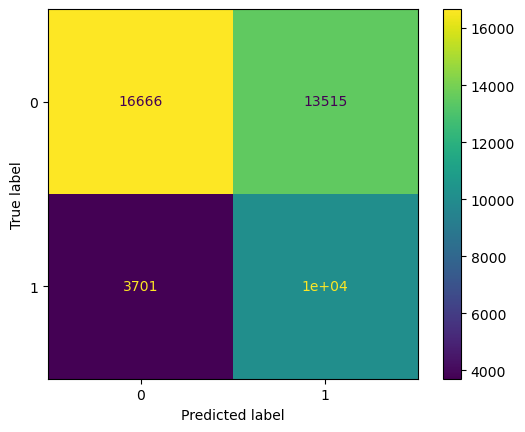

In [48]:
pred_test_y = model_1.predict(test_x)
print(f'train score: {model_1.score(train_x, train_y)}')
print(f'test score: {model_1.score(test_x, test_y)}')
print(classification_report(test_y, pred_test_y))
ConfusionMatrixDisplay.from_predictions(test_y, pred_test_y)

### Krzywa ROC

In [49]:
roc_auc_score(train_y, pred_train_proba)

0.7328122668220771

In [50]:
roc_auc_score(test_y, pred_test_proba)

0.7311260379324289

zobaczmy jak wyglada krzywa roc

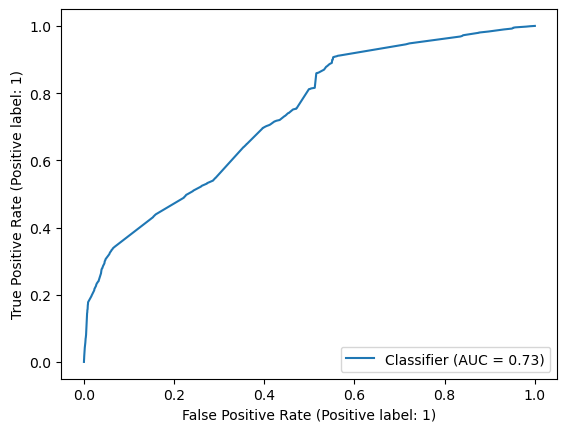

In [51]:
RocCurveDisplay.from_predictions(train_y, pred_train_proba)

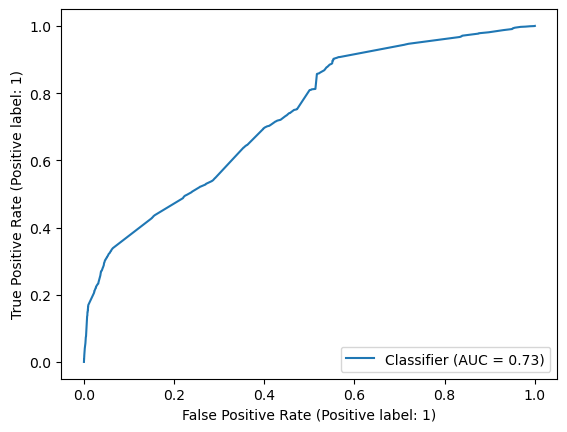

In [52]:
RocCurveDisplay.from_predictions(test_y, pred_test_proba)

Porownanie ze stats models

In [53]:
trainsm_x = sm.add_constant(train_x)

In [54]:
trainsm_x.head()

,const,sortowanie_produktu,wybor_obrazu,klik_na_strone_konta,klik_na_baner_promo,dodanie_do_listy_zyczen_z_detali,rozwijana_lista_produktu,sprawdzenie_info_dostawy_produkt,sprawdzenie_info_zwrotu,wyswietlenie_tabeli_rozmiarow,wyswietlenie_info_o_dostawie_FAQ,wyswietlenie_opcji_upgrade_konta,wyswietlenie_strony_glownej,urzadzenie_mobilne,komputer,tablet,powracajcy_klient,lokalizacja_uk
74173,1.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
60242,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
53697,1.0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1
140985,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1
114526,1.0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0


In [55]:
model_sm = sm.Logit(train_y, trainsm_x)

In [56]:
model_sm = model_sm.fit()

Optimization terminated successfully.
         Current function value: 0.532600
         Iterations 6


In [57]:
model_sm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                 Results: Logit
=================================================================================
Model:                   Logit                  Method:               MLE        
Dependent Variable:      dodanie_do_koszyka     Pseudo R-squared:     0.141      
Date:                    2024-06-15 14:04       AIC:                  187562.4109
No. Observations:        176048                 BIC:                  187743.8241
Df Model:                17                     Log-Likelihood:       -93763.    
Df Residuals:            176030                 LL-Null:              -1.0916e+05
Converged:               1.0000                 LLR p-value:          0.0000     
No. Iterations:          6.0000                 Scale:                1.0000     
---------------------------------------------------------------------------------
                                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------------------
const                            -2.9321   0.0767 -38.2164 0.0000 -3.0824 -2.7817
sortowanie_produktu               0.2740   0.0232  11.7931 0.0000  0.2285  0.3196
wybor_obrazu                      0.4758   0.0259  18.4001 0.0000  0.4251  0.5264
klik_na_strone_konta              0.0946   0.0690   1.3701 0.1706 -0.0407  0.2299
klik_na_baner_promo               0.6825   0.0294  23.1846 0.0000  0.6248  0.7402
dodanie_do_listy_zyczen_z_detali  0.2454   0.0638   3.8478 0.0001  0.1204  0.3704
rozwijana_lista_produktu          0.9103   0.0119  76.3795 0.0000  0.8869  0.9336
sprawdzenie_info_dostawy_produkt  2.3032   0.0179 128.4741 0.0000  2.2681  2.3384
sprawdzenie_info_zwrotu          -0.5232   0.0424 -12.3392 0.0000 -0.6063 -0.4401
wyswietlenie_tabeli_rozmiarow     0.0013   0.2091   0.0063 0.9950 -0.4086  0.4112
wyswietlenie_info_o_dostawie_FAQ -1.0671   0.0533 -20.0079 0.0000 -1.1716 -0.9625
wyswietlenie_opcji_upgrade_konta  0.1973   0.1167   1.6911 0.0908 -0.0314  0.4259
wyswietlenie_strony_glownej      -0.2784   0.0117 -23.8670 0.0000 -0.3012 -0.2555
urzadzenie_mobilne                0.8624   0.0715  12.0625 0.0000  0.7223  1.0025
komputer                          0.6430   0.0718   8.9610 0.0000  0.5024  0.7837
tablet                            0.5984   0.0721   8.3036 0.0000  0.4571  0.7396
powracajcy_klient                 0.0757   0.0117   6.4917 0.0000  0.0529  0.0986
lokalizacja_uk                    0.6387   0.0249  25.6093 0.0000  0.5898  0.6875
=================================================================================

"""

usunmy nie istotne wartosci sprawdzajmy baze

In [58]:
train_x = train_x.drop(columns = ['wyswietlenie_tabeli_rozmiarow'])
test_x = test_x.drop(columns = ['wyswietlenie_tabeli_rozmiarow'])

In [59]:
trainsm_x = sm.add_constant(train_x)

In [60]:
model_sm = sm.Logit(train_y, trainsm_x)

In [61]:
model_sm = model_sm.fit()

Optimization terminated successfully.
         Current function value: 0.532600
         Iterations 6


In [62]:
model_sm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                 Results: Logit
=================================================================================
Model:                   Logit                  Method:               MLE        
Dependent Variable:      dodanie_do_koszyka     Pseudo R-squared:     0.141      
Date:                    2024-06-15 14:04       AIC:                  187560.4110
No. Observations:        176048                 BIC:                  187731.7457
Df Model:                16                     Log-Likelihood:       -93763.    
Df Residuals:            176031                 LL-Null:              -1.0916e+05
Converged:               1.0000                 LLR p-value:          0.0000     
No. Iterations:          6.0000                 Scale:                1.0000     
---------------------------------------------------------------------------------
                                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------------------
const                            -2.9321   0.0767 -38.2166 0.0000 -3.0824 -2.7817
sortowanie_produktu               0.2740   0.0232  11.7931 0.0000  0.2285  0.3196
wybor_obrazu                      0.4758   0.0259  18.4001 0.0000  0.4251  0.5264
klik_na_strone_konta              0.0946   0.0690   1.3703 0.1706 -0.0407  0.2299
klik_na_baner_promo               0.6825   0.0294  23.1846 0.0000  0.6248  0.7402
dodanie_do_listy_zyczen_z_detali  0.2454   0.0638   3.8478 0.0001  0.1204  0.3704
rozwijana_lista_produktu          0.9103   0.0119  76.3865 0.0000  0.8869  0.9336
sprawdzenie_info_dostawy_produkt  2.3032   0.0179 128.4741 0.0000  2.2681  2.3384
sprawdzenie_info_zwrotu          -0.5232   0.0424 -12.3405 0.0000 -0.6062 -0.4401
wyswietlenie_info_o_dostawie_FAQ -1.0671   0.0533 -20.0080 0.0000 -1.1716 -0.9625
wyswietlenie_opcji_upgrade_konta  0.1973   0.1166   1.6913 0.0908 -0.0313  0.4259
wyswietlenie_strony_glownej      -0.2784   0.0117 -23.8703 0.0000 -0.3012 -0.2555
urzadzenie_mobilne                0.8624   0.0715  12.0627 0.0000  0.7223  1.0025
komputer                          0.6430   0.0718   8.9612 0.0000  0.5024  0.7837
tablet                            0.5984   0.0721   8.3038 0.0000  0.4571  0.7396
powracajcy_klient                 0.0757   0.0117   6.4920 0.0000  0.0529  0.0986
lokalizacja_uk                    0.6387   0.0249  25.6102 0.0000  0.5898  0.6875
=================================================================================

"""

In [63]:
train_x = train_x.drop(columns = ['wyswietlenie_opcji_upgrade_konta'])
test_x = test_x.drop(columns = ['wyswietlenie_opcji_upgrade_konta'])

In [64]:
trainsm_x = sm.add_constant(train_x)

In [65]:
model_sm = sm.Logit(train_y, trainsm_x)

In [66]:
model_sm = model_sm.fit()

Optimization terminated successfully.
         Current function value: 0.532608
         Iterations 6


In [67]:
model_sm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                 Results: Logit
=================================================================================
Model:                   Logit                  Method:               MLE        
Dependent Variable:      dodanie_do_koszyka     Pseudo R-squared:     0.141      
Date:                    2024-06-15 14:04       AIC:                  187561.2395
No. Observations:        176048                 BIC:                  187722.4957
Df Model:                15                     Log-Likelihood:       -93765.    
Df Residuals:            176032                 LL-Null:              -1.0916e+05
Converged:               1.0000                 LLR p-value:          0.0000     
No. Iterations:          6.0000                 Scale:                1.0000     
---------------------------------------------------------------------------------
                                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------------------
const                            -2.9327   0.0767 -38.2278 0.0000 -3.0830 -2.7823
sortowanie_produktu               0.2741   0.0232  11.7980 0.0000  0.2286  0.3196
wybor_obrazu                      0.4756   0.0259  18.3952 0.0000  0.4249  0.5263
klik_na_strone_konta              0.0970   0.0690   1.4067 0.1595 -0.0382  0.2322
klik_na_baner_promo               0.6831   0.0294  23.2062 0.0000  0.6254  0.7408
dodanie_do_listy_zyczen_z_detali  0.2461   0.0638   3.8576 0.0001  0.1210  0.3711
rozwijana_lista_produktu          0.9102   0.0119  76.3801 0.0000  0.8868  0.9336
sprawdzenie_info_dostawy_produkt  2.3036   0.0179 128.5028 0.0000  2.2684  2.3387
sprawdzenie_info_zwrotu          -0.5223   0.0424 -12.3231 0.0000 -0.6054 -0.4393
wyswietlenie_info_o_dostawie_FAQ -1.0631   0.0533 -19.9576 0.0000 -1.1675 -0.9587
wyswietlenie_strony_glownej      -0.2783   0.0117 -23.8658 0.0000 -0.3012 -0.2555
urzadzenie_mobilne                0.8633   0.0715  12.0771 0.0000  0.7232  1.0035
komputer                          0.6441   0.0718   8.9771 0.0000  0.5035  0.7847
tablet                            0.5994   0.0720   8.3191 0.0000  0.4582  0.7406
powracajcy_klient                 0.0759   0.0117   6.5038 0.0000  0.0530  0.0987
lokalizacja_uk                    0.6385   0.0249  25.6065 0.0000  0.5897  0.6874
=================================================================================

"""

In [68]:
train_x = train_x.drop(columns = ['klik_na_strone_konta'])
test_x = test_x.drop(columns = ['klik_na_strone_konta'])

In [69]:
trainsm_x = sm.add_constant(train_x)

In [70]:
model_sm = sm.Logit(train_y, trainsm_x)

In [71]:
model_sm = model_sm.fit()

Optimization terminated successfully.
         Current function value: 0.532614
         Iterations 6


In [72]:
model_sm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                 Results: Logit
=================================================================================
Model:                   Logit                  Method:               MLE        
Dependent Variable:      dodanie_do_koszyka     Pseudo R-squared:     0.141      
Date:                    2024-06-15 14:04       AIC:                  187561.2052
No. Observations:        176048                 BIC:                  187712.3829
Df Model:                14                     Log-Likelihood:       -93766.    
Df Residuals:            176033                 LL-Null:              -1.0916e+05
Converged:               1.0000                 LLR p-value:          0.0000     
No. Iterations:          6.0000                 Scale:                1.0000     
---------------------------------------------------------------------------------
                                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------------------
const                            -2.9360   0.0767 -38.2876 0.0000 -3.0863 -2.7857
sortowanie_produktu               0.2741   0.0232  11.7969 0.0000  0.2286  0.3196
wybor_obrazu                      0.4756   0.0259  18.3945 0.0000  0.4249  0.5263
klik_na_baner_promo               0.6833   0.0294  23.2156 0.0000  0.6256  0.7410
dodanie_do_listy_zyczen_z_detali  0.2471   0.0638   3.8750 0.0001  0.1221  0.3721
rozwijana_lista_produktu          0.9099   0.0119  76.3694 0.0000  0.8865  0.9332
sprawdzenie_info_dostawy_produkt  2.3045   0.0179 128.6271 0.0000  2.2693  2.3396
sprawdzenie_info_zwrotu          -0.5214   0.0424 -12.3009 0.0000 -0.6045 -0.4383
wyswietlenie_info_o_dostawie_FAQ -1.0602   0.0532 -19.9189 0.0000 -1.1645 -0.9559
wyswietlenie_strony_glownej      -0.2776   0.0117 -23.8271 0.0000 -0.3005 -0.2548
urzadzenie_mobilne                0.8671   0.0714  12.1383 0.0000  0.7271  1.0071
komputer                          0.6468   0.0717   9.0172 0.0000  0.5062  0.7874
tablet                            0.6023   0.0720   8.3629 0.0000  0.4611  0.7435
powracajcy_klient                 0.0760   0.0117   6.5192 0.0000  0.0532  0.0989
lokalizacja_uk                    0.6385   0.0249  25.6063 0.0000  0.5897  0.6874
=================================================================================

"""

Sprawdzmy co zostało

In [73]:
train_x.describe()

,sortowanie_produktu,wybor_obrazu,klik_na_baner_promo,dodanie_do_listy_zyczen_z_detali,rozwijana_lista_produktu,sprawdzenie_info_dostawy_produkt,sprawdzenie_info_zwrotu,wyswietlenie_info_o_dostawie_FAQ,wyswietlenie_strony_glownej,urzadzenie_mobilne,komputer,tablet,powracajcy_klient,lokalizacja_uk
count,176048.000000,176048.000000,176048.000000,176048.000000,176048.000000,176048.000000,176048.000000,176048.000000,176048.000000,176048.000000,176048.000000,176048.000000,176048.000000,176048.000000
mean,0.076064,0.055241,0.033746,0.007384,0.475938,0.130555,0.019018,0.011417,0.599939,0.641405,0.231863,0.133151,0.595809,0.923197
std,0.265102,0.228450,0.180576,0.085615,0.499422,0.336914,0.136587,0.106241,0.489912,0.479589,0.422023,0.339739,0.490736,0.266279
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [74]:
test_x.describe()

,sortowanie_produktu,wybor_obrazu,klik_na_baner_promo,dodanie_do_listy_zyczen_z_detali,rozwijana_lista_produktu,sprawdzenie_info_dostawy_produkt,sprawdzenie_info_zwrotu,wyswietlenie_info_o_dostawie_FAQ,wyswietlenie_strony_glownej,urzadzenie_mobilne,komputer,tablet,powracajcy_klient,lokalizacja_uk
count,44013.000000,44013.000000,44013.000000,44013.000000,44013.000000,44013.000000,44013.000000,44013.000000,44013.000000,44013.000000,44013.000000,44013.000000,44013.000000,44013.000000
mean,0.077023,0.055665,0.032718,0.006793,0.479836,0.128348,0.018904,0.011678,0.601163,0.639516,0.230636,0.136142,0.593847,0.922341
std,0.266630,0.229277,0.177899,0.082143,0.499599,0.334481,0.136186,0.107435,0.489665,0.480146,0.421245,0.342943,0.491119,0.267637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


REGRESJA LOGISTYCZNA - na istotnych kolumnach

In [75]:
model_2 = LogisticRegression()

In [76]:
model_2.fit(train_x, train_y)

LogisticRegression()

In [77]:
model_2.coef_

array([[ 0.27386758,  0.47512304,  0.68253154,  0.24629632,  0.90969417,
         2.30327335, -0.51995586, -1.05607351, -0.27757123,  0.85668685,
         0.63649731,  0.59206983,  0.07606159,  0.63783483]])

In [78]:
model_2.feature_names_in_

array(['sortowanie_produktu', 'wybor_obrazu', 'klik_na_baner_promo',
       'dodanie_do_listy_zyczen_z_detali', 'rozwijana_lista_produktu',
       'sprawdzenie_info_dostawy_produkt', 'sprawdzenie_info_zwrotu',
       'wyswietlenie_info_o_dostawie_FAQ', 'wyswietlenie_strony_glownej',
       'urzadzenie_mobilne', 'komputer', 'tablet', 'powracajcy_klient',
       'lokalizacja_uk'], dtype=object)

In [79]:
coef2 = pd.DataFrame({'Variables': train_x.columns, 'Coeffitiens':model_2.coef_[0]})
coef2

,Variables,Coeffitiens
0,sortowanie_produktu,0.273868
1,wybor_obrazu,0.475123
2,klik_na_baner_promo,0.682532
3,dodanie_do_listy_zyczen_z_detali,0.246296
4,rozwijana_lista_produktu,0.909694
5,sprawdzenie_info_dostawy_produkt,2.303273
6,sprawdzenie_info_zwrotu,-0.519956
7,wyswietlenie_info_o_dostawie_FAQ,-1.056074
8,wyswietlenie_strony_glownej,-0.277571
9,urzadzenie_mobilne,0.856687


In [82]:
# Sortowanie malejąco względem kolumny 'Coeffitiens'
coef2_sorted = coef2.sort_values(by='Coeffitiens', ascending=False)

# Wypisanie posortowanego DataFrame
print(coef2_sorted)
coef2_sorted.to_csv('posortowany_coef2.csv', index=False)

                           Variables  Coeffitiens
5   sprawdzenie_info_dostawy_produkt     2.303273
4           rozwijana_lista_produktu     0.909694
9                 urzadzenie_mobilne     0.856687
2                klik_na_baner_promo     0.682532
13                    lokalizacja_uk     0.637835
10                          komputer     0.636497
11                            tablet     0.592070
1                       wybor_obrazu     0.475123
0                sortowanie_produktu     0.273868
3   dodanie_do_listy_zyczen_z_detali     0.246296
12                 powracajcy_klient     0.076062
8        wyswietlenie_strony_glownej    -0.277571
6            sprawdzenie_info_zwrotu    -0.519956
7   wyswietlenie_info_o_dostawie_FAQ    -1.056074


In [83]:
model_2.intercept_

array([-2.92466252])

In [84]:
pred_train = model_2.predict(train_x)
pred_train

array([0, 0, 0, ..., 0, 0, 0])

In [85]:
pred_train_proba = model_2.predict_proba(train_x)
pred_train_proba

array([[0.74691385, 0.25308615],
       [0.87301698, 0.12698302],
       [0.83639561, 0.16360439],
       ...,
       [0.84653929, 0.15346071],
       [0.62725221, 0.37274779],
       [0.8389357 , 0.1610643 ]])

In [86]:
pred_train_proba = model_2.predict_proba(train_x)[:,1]
pred_train_proba

array([0.25308615, 0.12698302, 0.16360439, ..., 0.15346071, 0.37274779,
       0.1610643 ])

In [87]:
accuracy_score(train_y, pred_train)

0.750977006271017

In [88]:
confusion_matrix(train_y, pred_train)

array([[115098,   6161],
       [ 37679,  17110]], dtype=int64)

In [89]:
pred_test = model_2.predict(test_x)

In [90]:
accuracy_score(test_y, pred_test)

0.7490741371867403

In [91]:
confusion_matrix(test_y, pred_test)

array([[28715,  1466],
       [ 9578,  4254]], dtype=int64)

train score: 0.750977006271017
test score: 0.7490741371867403
              precision    recall  f1-score   support

           0       0.75      0.95      0.84     30181
           1       0.74      0.31      0.44     13832

    accuracy                           0.75     44013
   macro avg       0.75      0.63      0.64     44013
weighted avg       0.75      0.75      0.71     44013



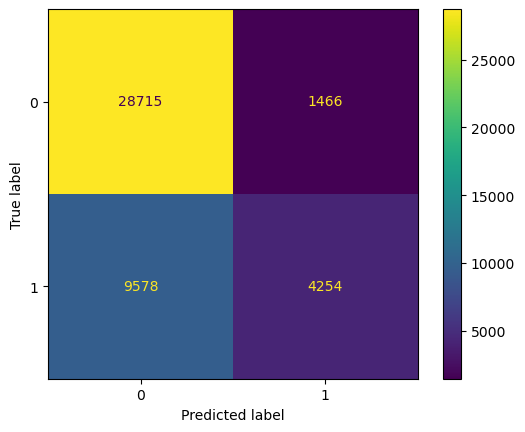

In [92]:
pred_test_y = model_2.predict(test_x)
print(f'train score: {model_2.score(train_x, train_y)}')
print(f'test score: {model_2.score(test_x, test_y)}')
print(classification_report(test_y, pred_test_y))
ConfusionMatrixDisplay.from_predictions(test_y, pred_test_y)
plt.savefig('confusion_matrix.png', transparent=True)

In [93]:
model_2.feature_names_in_

array(['sortowanie_produktu', 'wybor_obrazu', 'klik_na_baner_promo',
       'dodanie_do_listy_zyczen_z_detali', 'rozwijana_lista_produktu',
       'sprawdzenie_info_dostawy_produkt', 'sprawdzenie_info_zwrotu',
       'wyswietlenie_info_o_dostawie_FAQ', 'wyswietlenie_strony_glownej',
       'urzadzenie_mobilne', 'komputer', 'tablet', 'powracajcy_klient',
       'lokalizacja_uk'], dtype=object)

In [94]:
X_model2 = df_all[model_2.feature_names_in_]
X_model2

,sortowanie_produktu,wybor_obrazu,klik_na_baner_promo,dodanie_do_listy_zyczen_z_detali,rozwijana_lista_produktu,sprawdzenie_info_dostawy_produkt,sprawdzenie_info_zwrotu,wyswietlenie_info_o_dostawie_FAQ,wyswietlenie_strony_glownej,urzadzenie_mobilne,komputer,tablet,powracajcy_klient,lokalizacja_uk
0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,1,0,1,1
2,0,0,1,0,1,0,0,0,0,1,0,0,1,0
3,0,0,0,0,1,0,0,0,0,1,0,0,1,0
4,0,0,0,0,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220056,0,0,0,0,0,1,0,0,0,0,1,0,0,1
220057,1,0,0,0,0,1,0,0,1,0,1,0,1,1
220058,0,0,0,0,1,1,0,0,0,1,0,0,1,1
220059,1,0,0,0,1,0,0,0,1,0,1,0,1,1


In [95]:
no_of_users = df_all['dodanie_do_koszyka'].count()
base_no_of_basket = df_all['dodanie_do_koszyka'].sum()
model_basket_prediction = model_2.predict(X_model2).sum()
model_basket_conversion = (model_basket_prediction / no_of_users).round(3)

print(f'Bazowa liczba dodan do koszyka: {base_no_of_basket}')
print(f'Bazowa konwersja: {(base_no_of_basket / no_of_users).round(3)}')
print('\n')
print(f'Bazowa prognoza liczby dodan do koszyka: {model_basket_prediction}')
print(f'Bazowa prognoza konwersji: {model_basket_conversion}')

for i in model_2.feature_names_in_:
    X_model2_pred = pd.DataFrame(X_model2)

    row = coef2[coef2["Variables"] == i]
    value = row['Coeffitiens'].values[0]

    if value > 0:
        X_model2_pred[i] = 1
    else:
        X_model2_pred[i] = 0

    model_basket_new_prediction = model_2.predict(X_model2_pred).sum()
    model_basket_new_conversion = (model_basket_new_prediction / no_of_users).round(3)
    basket_boost = model_basket_new_prediction - model_basket_prediction
    conversion_boost = model_basket_new_conversion - model_basket_conversion

    print('\n')
    print(f'-----przyrost na maksymalizacji "{i}"-----')
    print(f'współczynnik = {value}')
    print(f'Nowa prognoza liczby dodan: {model_basket_new_prediction}')
    print(f'Nowa prognoza konwersji: {model_basket_new_conversion}')
    print(f'Wzrost prognozy liczby dodan: {basket_boost}')
    print(f'Wzrost prognozy konwersji: {conversion_boost}')

Bazowa liczba dodan do koszyka: 68621
Bazowa konwersja: 0.312


Bazowa prognoza liczby dodan do koszyka: 28991
Bazowa prognoza konwersji: 0.132


-----przyrost na maksymalizacji "sortowanie_produktu"-----
współczynnik = 0.2738675756067502
Nowa prognoza liczby dodan: 31853
Nowa prognoza konwersji: 0.145
Wzrost prognozy liczby dodan: 2862
Wzrost prognozy konwersji: 0.012999999999999984


-----przyrost na maksymalizacji "wybor_obrazu"-----
współczynnik = 0.47512304416051093
Nowa prognoza liczby dodan: 52679
Nowa prognoza konwersji: 0.239
Wzrost prognozy liczby dodan: 23688
Wzrost prognozy konwersji: 0.10699999999999998


-----przyrost na maksymalizacji "klik_na_baner_promo"-----
współczynnik = 0.6825315355494892
Nowa prognoza liczby dodan: 70564
Nowa prognoza konwersji: 0.321
Wzrost prognozy liczby dodan: 41573
Wzrost prognozy konwersji: 0.189


-----przyrost na maksymalizacji "dodanie_do_listy_zyczen_z_detali"-----
współczynnik = 0.24629631721763262
Nowa prognoza liczby dodan: 31923
Nowa